# Homework 3: Hypothesis Testing
## CMSC320 Fall 2023
### Jose Valdivia Rojas

#### Introduction
This homework will help you practice a variety of cases where hypothesis testing is needed. Refer to the variable description below when completing this assignment to help determine the best possible hypothesis test. Before performing hypothesis tests, you should investigate variables and their distributions in the dataset. For hypothesis testing, write out the null and alternate hpyothesis, use numpy/scipy to perform calculations, and detail a short conclusion. Please try to use markdown for any written analysis!

[NumPy Stats Documentation](https://numpy.org/doc/stable/reference/routines.statistics.html) (Basic Statistics)

[SciPy Stats Documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) (Hypothesis Testing)
 
Read Up On and Use ONLY these tests for this homework.
- Chi-Squared Test For Independence
- Z test
- T Test
- Mann-Whitney U Test

#### Dataset

| Variable          |Definition | Key |
| :---------------- | :------: | ----: |
| survival          |   Surivival   | 0 = No, 1 = Yes |
| pclass           |    Ticket class   | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex    |  Sex   | 19.99 |
| age |  Age in years   | 42.99 |
| sibsp |  # of siblings / spouses aboard the Titanic   | 42.99 |
| parch    |  # of parents / children aboard the Titanic   | 19.99 |
| ticket    |  Ticket   | 19.99 |
| fare    |  Passenger Fare   | 19.99 |
| cabin    |  Cabin Number   | 19.99 |
| embarked    |  Port of Embarkation   | C = Cherbourg, Q = Queenstown, S = Southampton |

#### Variable Notes
pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

## Part 1: Cleaning and Exploration of Data
This part is not graded. Clean and explore data as you see fit.

In [64]:
import pandas as pd
import numpy as np
import scipy as sp

In [54]:
data = pd.read_csv("data.csv")

# dropping cabin column since it has too many missing values and does not have significance or relevance to the analysis
data = data.drop(columns=["Cabin"])


# Mean Imputing for missing value since age column is important
data["Age"].fillna(data["Age"].median(), inplace=True)

# Mode Imputating for fillling missing values with the most frequent one
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)

data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## Part 2: Guided Research

1. Determine data type (numerical, catagorical, etc) and qualifying conditions for the following hypothesis tests. These will be the hypothesis tests that you will use to complete the rest of the homework.
    - Chi-Squared Test For Independence
    - Z test
    - T Test
    - Mann-Whitney U Test

Answer Here

## Chi-Squared Test For Independence
- Data Type: Categorical
- Qualifying Conditions: 
  - Appropiate When both variables are categorical
  - Used to test independence between two categorical variables
  
  

## Z Test
- Data Type: Numerical
- Qualifying Conditions:
  - Know the standard deviation of the population or have a large sample to estimate S.D from it
  - Appropiate for normally distributed data or large sample sizes
  - Used to compare sample mean to a known population mean 

## T Test
- Data Type: Numerical
- Qualifying Conditions:
  - Don't know the standard deviation.
  - Appropiate for smaller sample sizes (n < 30)
  - Used to compare a sample mean to a known population mean (1 sample)
  - Used to compare means between two groups:
    - Indenpendent Sample T Tests: Used to compare two independent groups (2 sample)
    - Paired T Test: Used to compare for paired or dependent samples (2 sample)

## Mann-Whitey U Test
- Data Type: Numerical
- Qualifying Conditions:
  - Appropiate for non-normally distributed data
  - Used to compare two independent groups when assumptions of normality are not met. In other words, used to test if there are differences in the distribution of two groups but don't assume data follows a normal distribution.

## Part 3: Hypothesis Testing with Two Catagorical Variables
Use $\alpha = 0.01$ for all statistical tests. Essentially, this is the treshold that you compare to the calculated p-value in order to determine statistical significance.

### A. Surviving and Sex (Partial Example)
Notice some of the work is already done for you to get you started.

#### 1. Create Contingency Table
|           | Male | Female |
| :--------: | :--------: | :--------: |
| Survived          |   81   | 233 |
| Did not Survive   |    468  | 109 |

Example code to create contigency table below

In [56]:
# Code to create contigency table is provided below

pd.crosstab(data["Sex"], data["Survived"].apply(lambda x: "Not Survived" if x == 0 else "Survived"))

Survived,Not Survived,Survived
Sex,,
female,81,233
male,468,109


#### 2. Create Null and Alternate Hypothesis (Already done as example for this question)

$N_0 = $ Sex and Survival are independent variables

$N_A = $ There's a significant association between sex and survival

#### 3. Perform Appropriate Hypothesis Test and Calculate P-Value 
Use Numpy and Scipy, Do NOT manually do calculations

In [57]:
######################################################
# Performing Chi-Squared Test for Independence
######################################################

from scipy.stats import chi2_contingency # for chi-square test

# Create the contingency table as a NumPy array
arr = np.array([[81, 233], [468, 109]])

# Perform the Chi-Squared Test for Independence
chi2, p, _, _ = chi2_contingency(arr)

# Output the results
print(f"Chi-Squared Statistic: {chi2}")
print(f"P-Value: {p}")

# Compare the p-value to the alpha level (0.01)
alpha = 0.01

if p < alpha:
    print("Reject the null hypothesis: There is a significant association between sex and survival.")
else:
    print("Fail to reject the null hypothesis: Sex and survival are independent variables.")

Chi-Squared Statistic: 260.71702016732104
P-Value: 1.1973570627755645e-58
Reject the null hypothesis: There is a significant association between sex and survival.


#### 4. Interpret Results
Be specific. Determine whether to reject or accept the Null Hypothesis. Was there a group in particular that was more likely to survive the Titanic?

#### Answer
Since the p-value (very small value close to zero) is significantly smaller than alpha (0.01), **we reject the null hypothesis**

Rejecting null hypothesis means that there is a significant association between sex and survival. In the dataset, this implies that gender played a significant role in determining people survival. 81 males survived while 233 females survived from the contigency table. This data aligns with the historical events where children and women were prioritized during evacuation of Titanic.

### B. Surviving and Ticket Class
#### 1. Create Contingency Table

In [58]:
pd.crosstab(data["Pclass"], data["Survived"].apply(lambda x: "Not Survived" if x == 0 else "Survived"))

Survived,Not Survived,Survived
Pclass,,
1,80,136
2,97,87
3,372,119


#### 2. Create Null and Alternate Hypothesis



$N_0 = $ There is no significant association between the ticket class and survival. Ticket class and Survival are independent variables.

$N_A = $ There's a significant association between ticket class and survival. Ticket class of passengers is associated with their likelihood of survival on the Titanic.

#### 3. Perform Appropriate Hypothesis Test and Calculate P-Value 

In [59]:
######################################################
# Performing Chi-Squared Test for Independence
######################################################

from scipy.stats import chi2_contingency # for chi-square test

# contingency table
contingency_table = pd.crosstab(data["Pclass"], data["Survived"].apply(lambda x: "Not Survived" if x == 0 else "Survived"))

# Perform the Chi-Squared Test for Independence
chi2, p, _, _ = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Squared Statistic: {chi2}")
print(f"P-Value: {p}")

# Compare the p-value to the alpha level (0.01)
alpha = 0.01
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between ticket class and survival.")
else:
    print("Fail to reject the null hypothesis: Ticket class and survival are independent variables.")

Chi-Squared Statistic: 102.88898875696056
P-Value: 4.549251711298793e-23
Reject the null hypothesis: There is a significant association between ticket class and survival.


#### 4. Interpret Results

Since the p-value 1.1813624785477922e-22 (very small value close to zero) is significantly smaller than alpha (0.01), **we reject the null hypothesis**

Rejecting null hypothesis means that there is a significant association between ticket class and survival. In the dataset, the ticket class played a significant role in determining passenger survival. 

**First-class** had a higher likelihood of survival compared to third-class and **second-class** had higher likelihood of survival compared to third-class.

This aligns with the historical events in Titanic, where higher-class passengers were prioritized along with women and childs. 


### C. Surviving and Embarked Location
#### 1. Create Contingency Table

In [60]:
pd.crosstab(data["Embarked"], data["Survived"].apply(lambda x: "Not Survived" if x == 0 else "Survived"))

Survived,Not Survived,Survived
Embarked,,
C,75,93
Q,47,30
S,427,219


#### 2. Create Null and Alternate Hypothesis 

$N_0 = $ The location of embark and survival are not significant associated

$N_A = $ There's a significant association between the embarkation location and survival

#### 3. Perform Appropriate Hypothesis Test and Calculate P-Value

In [61]:
from scipy.stats import chi2_contingency # for chi-square test

# contingency table
contingency_table = pd.crosstab(data["Embarked"], data["Survived"].apply(lambda x: "Not Survived" if x == 0 else "Survived"))


# Perform the Chi-Squared Test for Independence
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-Squared Statistic: {chi2}")
print(f"P-Value: {p}")

# Compare the p-value to the alpha level (0.01)
alpha = 0.01
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between embarkation location and survival.")
else:
    print("Fail to reject the null hypothesis: Embarkation location and survival are independent variables.")

Chi-Squared Statistic: 25.964452881874784
P-Value: 2.3008626481449577e-06
Reject the null hypothesis: There is a significant association between embarkation location and survival.


#### 4. Interpret Results 

Since this **p-value** 2.30e-06 is significantly smaller than the alpha level of 0.01, we reject the null hypothesis. This means that there is a significant association between the embarkation location and survival. This implies that passengers who boarded at different locations had different chances of survival

## Part 4: Hypothesis Testing with Numeric Variables

### A. Surviving and Age (Partial Example)
#### 1. Understand the distribution of the two populations (Normal or Not Normal)

The distributions are plotted for you below in this partial example. As shown by the graphs below, distribution of age for both groups (survived and not survived) is found to be approximately normal.

Hint: Notice that there are missing values for age and you will have to handle this before performing hypothesis tests!

Text(0.5, 1.0, 'Histogram of Age of People who Survived')

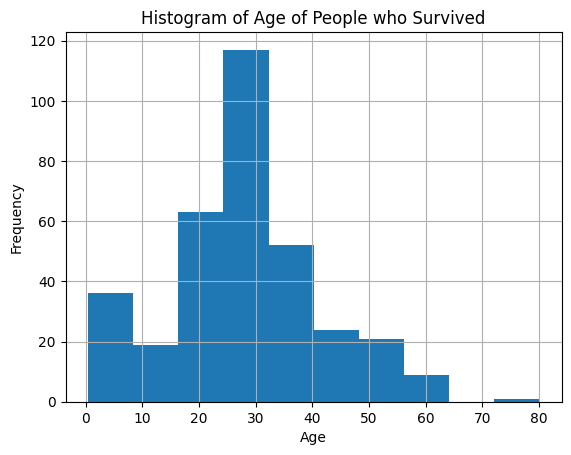

In [66]:
survived = data.loc[data["Survived"] == 1]
no_survived = data.loc[data["Survived"] == 0]
ax = survived["Age"].hist()
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of Age of People who Survived")

Text(0.5, 1.0, 'Histogram of Age of People who did not Survived')

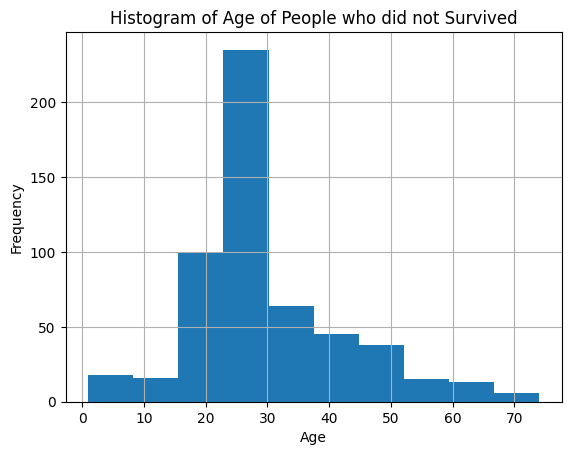

In [67]:
ax = no_survived["Age"].hist()
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of Age of People who did not Survived")

#### 2. Create Null and Alternate Hypothesis 

$N_0 = $ The mean age of people who survived is equal to the mean age of people who did not survive.

$N_A = $ The mean age of people who survived is not equal to the mean age of people who did not survive

#### 3. Perform Appropriate Hypothesis Test and Calculate P-Value (Use the fact that the distribution is approximately normal to select your hypothesis test)

Since the distribution of age for both groups survided and not survived is approximately normal, I will perform a Independent (two-sample) T Test to compare the means of these two groups.

In [72]:
from scipy.stats import ttest_ind

# Extract the age data for both groups
age_survived = data.loc[data["Survived"] == 1]["Age"]
age_not_survived = data.loc[data["Survived"] == 0]["Age"]

# Perform the two-sample t-test
t_test, p_value = ttest_ind(age_survived, age_not_survived)

# Output the results
print(f"T-Statistic: {t_test}")
print(f"P-Value: {p_value}")

# Compare the p-value to the alpha level (0.01)
alpha = 0.01
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the ages of survivors and non-survivors.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the ages of survivors and non-survivors.")


T-Statistic: -1.9394659179476366
P-Value: 0.0527606884758555
Fail to reject the null hypothesis: There is no significant difference in the ages of survivors and non-survivors.


#### 4. Interpret Results

The t-statistic is approximately -1.939 and the p-value is approximately 0.0528. Since the p-value (0.0528) is greater than the chosen alpha level (0.01), we fail to reject the null hypothesis. This means there is no significant difference in the ages of survivors and non-survivors. In other words, the data does not provide sufficient evidence to conclude that the mean age of survivors is different from the mean age of non-survivors.

In conclusion, age alone may not be a strong factor for passenger survival on the Titanic.

### B. Surviving and Fare
#### 1. Understand the distribution of the two populations (Normal or Not Normal)
Plot the distributions like in previous question. Use plots to determine normality.

Text(0.5, 1.0, 'Histogram of Fare of People who Survived')

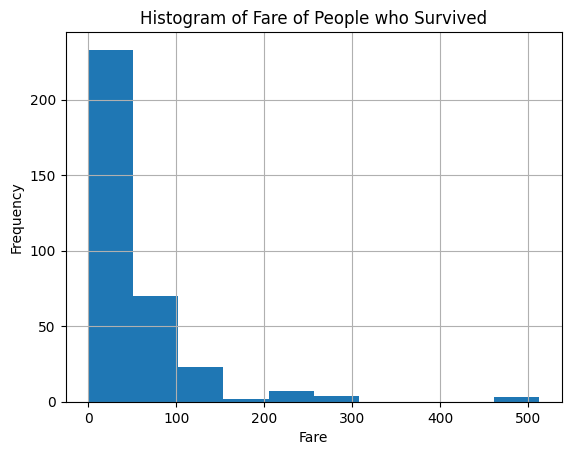

In [74]:
fare_survived = data.loc[data["Survived"] == 1]
fare_not_survived = data.loc[data["Survived"] == 0]
ax = fare_survived["Fare"].hist()
ax.set_xlabel("Fare")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of Fare of People who Survived")

Text(0.5, 1.0, 'Histogram of Fare of People who did not Survived')

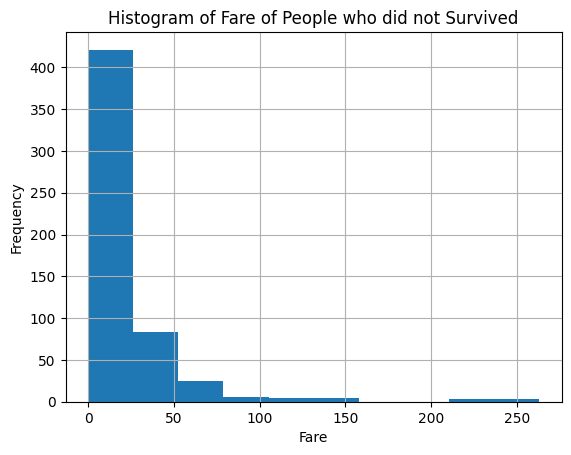

In [75]:
ax = fare_not_survived["Fare"].hist()
ax.set_xlabel("Fare")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of Fare of People who did not Survived")

#### 2. Create Null and Alternate Hypothesis 

$N_0 = $ The mean fare of people who survived is equal to the mean fare of people who did not survive.

$N_A = $ The mean fare of people who survived is not equal to the mean fare of people who did not survive

#### 3. Perform Appropriate Hypothesis Test and Calculate P-Value (Use characteristics from distribution)

Both the "Survived" and "Not Survived" groups do not appear to be normal distributed in the histograms, and the data may not meet the assumptions of normality, so a non-parametric test to compare the medians of the two groups will be suitable here. 

That being said, I will perform Mann-Whitney U Test since it is appropiate for non-normally distributed data and I wil use it to compare two independent groups (surviving and fare) when assumptions of normality are not met.

In [76]:
from scipy.stats import mannwhitneyu

# Extract the fare data for both groups
fare_survived = data.loc[data["Survived"] == 1]["Fare"].dropna()
fare_not_survived = data.loc[data["Survived"] == 0]["Fare"].dropna()

# Perform the Mann-Whitney U Test
statistic, p_value = mannwhitneyu(fare_survived, fare_not_survived)

# Output the results
print(f"Mann-Whitney U Statistic: {statistic}")
print(f"P-Value: {p_value}")

# Compare the p-value to the alpha level (0.01)
alpha = 0.01

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the fares paid by survivors and non-survivors.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the fares paid by survivors and non-survivors.")

Mann-Whitney U Statistic: 129951.5
P-Value: 4.553477179250237e-22
Reject the null hypothesis: There is a significant difference in the fares paid by survivors and non-survivors.


#### 4. Interpret Results

The Mann-Whitney U Statistic is approximately 129,951.5, and the p-value is approximately 4.55e-22. Since this p-value is significantly smaller than the alpha level of 0.01, we reject the null hypothesis. This means there is a significant difference in the fares paid by survivors and non-survivors. That is, the data provides strong evidence that the median fare paid by passengers who survived is different from the median fare paid by passengers who did not survive. 

The results suggest that the fare paid by passengers was associated with their likelihood of survival. Passengers who paid higher fares had a higher chance of survival.